In [2]:
%matplotlib inline

In [3]:
import numpy
import pylab
import seaborn
import glob

In [4]:
cd ~/dev/sourmash/sourmash_lib/

/Users/philliptbrooks/dev/sourmash/sourmash_lib


In [5]:
import fig

In [6]:
cd ~/Dropbox/2017_Dysfunction_of_the_gut_microbiome/fastq

/Users/philliptbrooks/Dropbox/2017_Dysfunction_of_the_gut_microbiome/fastq


In [6]:
%%bash
for i in 21 41 31 51
do
~/dev/sourmash/sourmash compare -o gut_k${i} *1000.sig -k${i}
done

0-SRR579274_pass_1.pe.fq.gz.abundtrim	[ 1.     0.01   0.023  0.04   0.187  0.118  0.136  0.08   0.06   0.107
  0.065]
1-SRR579275_pass_1.pe.fq.gz.abundtrim	[ 0.043  1.     0.018  0.018  0.121  0.107  0.058  0.038  0.091  0.044
  0.032]
2-SRR579276_pass_1.pe.fq.gz.abundtrim	[ 0.033  0.006  1.     0.015  0.078  0.072  0.058  0.115  0.051  0.059
  0.089]
3-SRR579277_pass_1.pe.fq.gz.abundtrim	[ 0.072  0.008  0.019  1.     0.163  0.156  0.087  0.048  0.067  0.065
  0.04 ]
4-SRR579278_pass_1.pe.fq.gz.abundtrim	[ 0.042  0.006  0.012  0.02   1.     0.101  0.065  0.053  0.044  0.049
  0.054]
5-SRR579279_pass_1.pe.fq.gz.abundtrim	[ 0.035  0.007  0.014  0.025  0.133  1.     0.057  0.031  0.203  0.031
  0.057]
6-SRR579280_pass_1.pe.fq.gz.abundtrim	[ 0.085  0.009  0.025  0.03   0.182  0.12   1.     0.118  0.028  0.11
  0.092]
7-SRR579281_pass_1.pe.fq.gz.abundtrim	[ 0.021  0.002  0.021  0.007  0.064  0.028  0.05   1.     0.01   0.028
  0.089]
8-SRR579290_pass_1.pe.fq.gz.abundtrim	[ 0.023  0.008  0.0

# running sourmash subcommand: compare
loading SRR579274_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579275_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579276_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579277_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579278_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579279_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579280_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579281_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579290_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579291_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579292_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
min similarity in matrix: 0.0024242424242424242
saving labels to: gut_k21.labels.txt
saving distance matrix to: gut_k21
# running sourmash subcommand: compare
loading SRR579274_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579275_pass_1.pe.fq.gz.abundtrim.scaled_1000.sig
loading SRR579276_pass

(0.091282384915017598, 20.0)

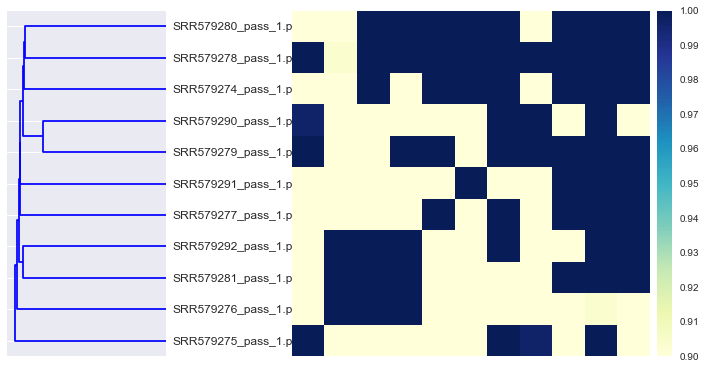

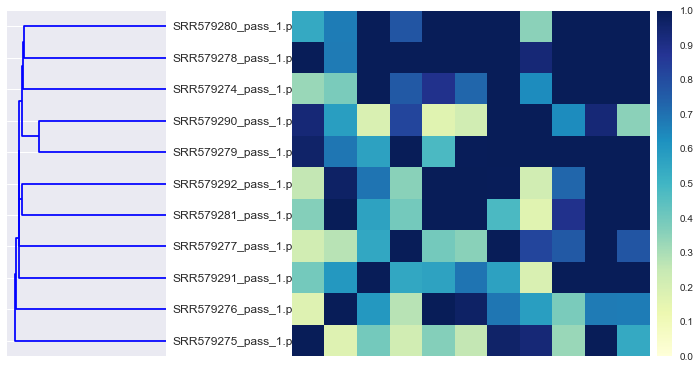

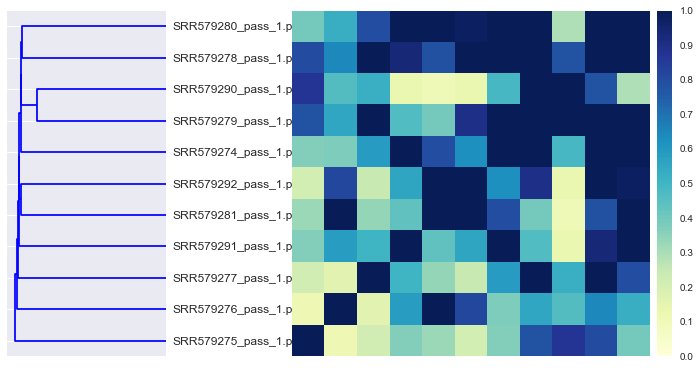

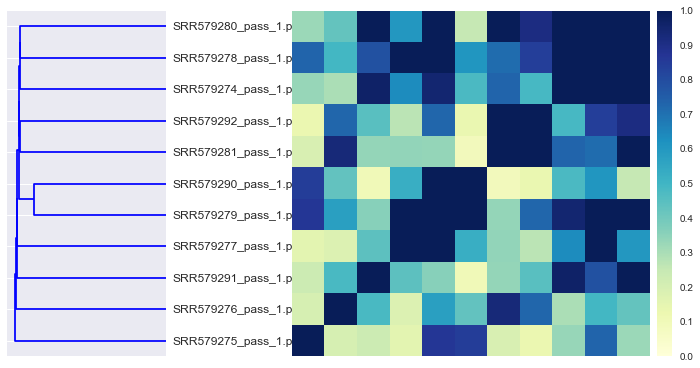

In [8]:
D, labels = fig.load_matrix_and_labels('gut_k21')
D = (D + D.T) / 0.1
_ = fig.plot_composite_matrix(D, labels, vmin=0.9)
numpy.min(D), numpy.max(D)

D, labels = fig.load_matrix_and_labels('gut_k31')
D = (D + D.T) / 0.1
_ = fig.plot_composite_matrix(D, labels, vmin=0.0)
numpy.min(D), numpy.max(D)

D, labels = fig.load_matrix_and_labels('gut_k41')
D = (D + D.T) / 0.1
_ = fig.plot_composite_matrix(D, labels, vmin=0.0)
numpy.min(D), numpy.max(D)

D, labels = fig.load_matrix_and_labels('gut_k51')
D = (D + D.T) / 0.1
_ = fig.plot_composite_matrix(D, labels, vmin=0.0)
numpy.min(D), numpy.max(D)

In [7]:
for i in glob.glob('gut_k*'):
    if i.endswith("labels.txt") or i.endswith(".csv"):
        continue
        print (i)
    D, labels = fig.load_matrix_and_labels(i)
    D = (D + D.T) / 2.0
    numpy.savetxt("{}.csv".format(i), D, delimiter=",")

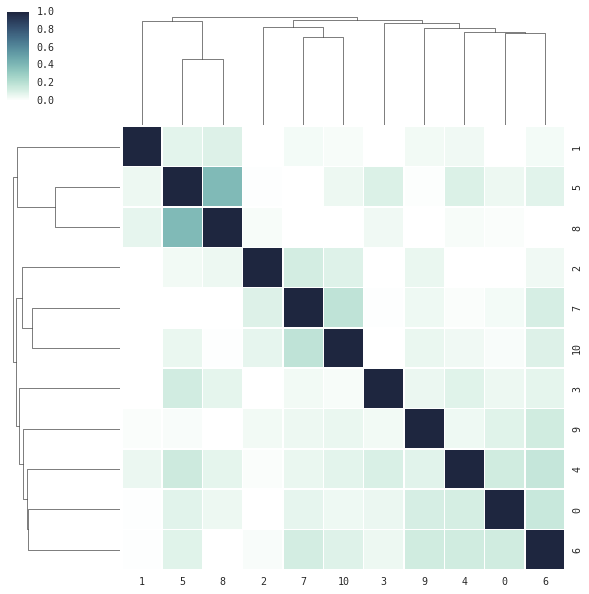

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="monospace")

# Load the dataset
df = pd.read_csv('gut_k21.csv', header = None)


# Convert the palette to vectors that will be drawn on the side of the matrix

# Create a custom colormap for the heatmap values
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)


# Draw the full plot
sns.set_context("notebook")
sns.clustermap(df.corr(), linewidths=.5, figsize=(10, 10), standard_scale=1, cmap=cmap)